#### ML for classification - Support Vector Machine
- Unlike the previous two classification methods, logistic regression and kNN, the basic principle behind SVM is to formally define a hyperplane (in two dimensional space it is simply a line), which acts like a decision boundary between two classes and best separates the classes. 
- Some terminology:  
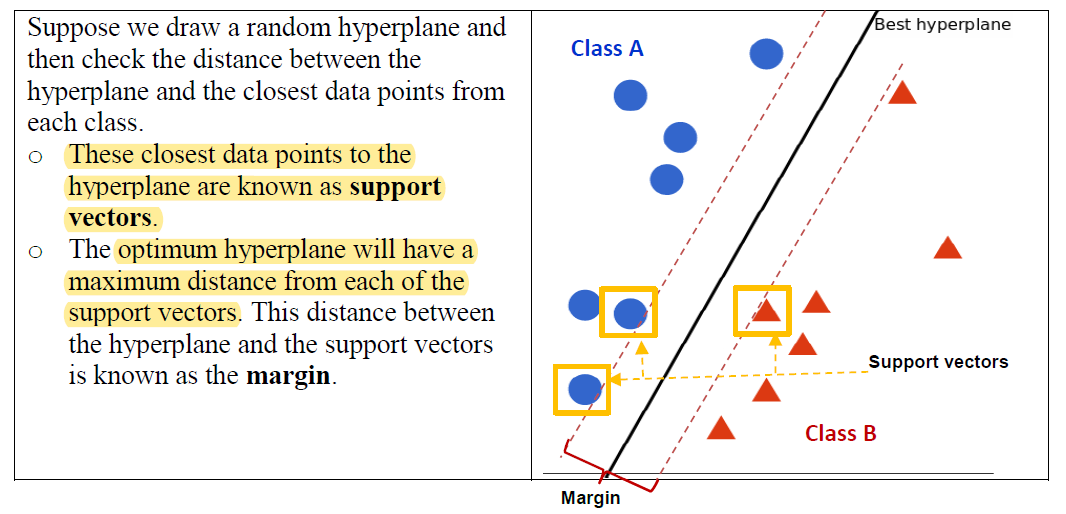

- The goal of SVM is thus to define the best hyperplane such that the margin is maximized and no data points lie within the margin. This is a constrained optimization problem that can be solved using the method of Lagrange multipliers.
- In practice, not all classes can be well separated by drawing a straight line (or linear hyperplane). Using the **kernel trick**, we can map the input space to some higher-dimensional feature space where the training set is linearlly separable. 
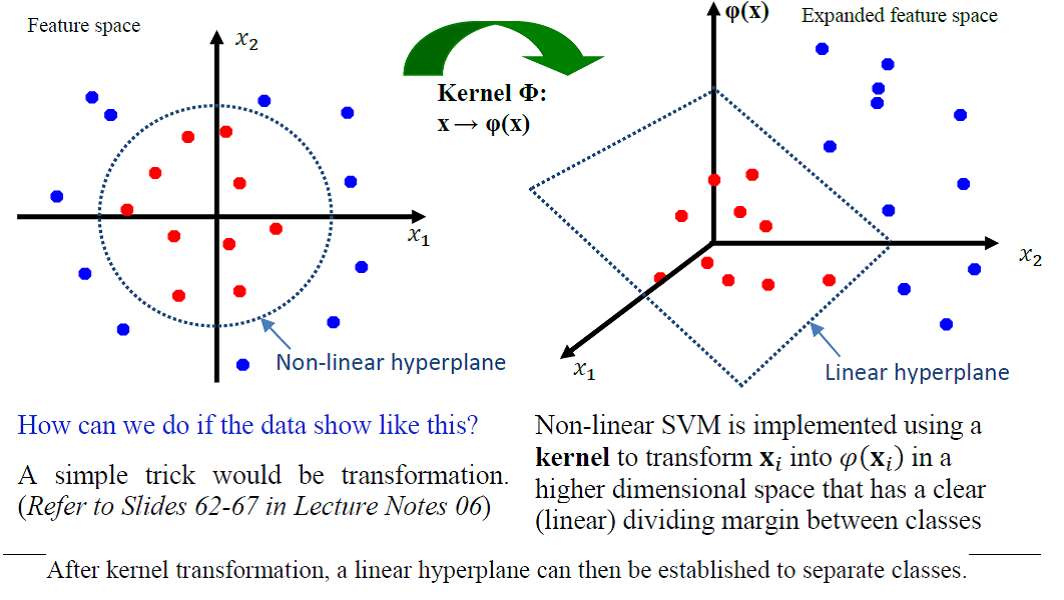
- Examples of such kernel functions are (a) **Linear(Default choice)**, (b) **Polynomial**, (c) **Radial** and (d) **Sigmoid**.
- **Advantages of SVM**: (a) Effective in higher dimensional cases, (b) Best algorithm when classes are separable, (c) Outliers have less impact since the hyperplane is only affected by the support vectors.
- **Disadvantages**: (a) Computationally intensive for large datasets, (b) May not perform well when classes have extensive overlap, (c) selecting the appropriate kernel function is difficult.

In [1]:
install.packages("e1071")

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


In [2]:
library(dplyr)
library(e1071)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
stats <- read.csv('diabetes.csv', header=T); head(stats)
dim(stats)
summary(stats)
str(stats)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


[1] 768   9

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [5]:
stats$Outcome <- factor(stats$Outcome, levels=c(0,1))  # Convert outcome predictor to categorical variable
nor <- function(x) { 
    (x-min(x))/(max(x)-min(x)) 
}
stats[,1:8] <- sapply(stats[,1:8], as.numeric)
stats[,1:8] <- sapply(stats[,1:8], nor)

# Split data into training and test sets (80/20 rule)
set.seed(100) 
trg_idx <- sample(nrow(stats), nrow(stats)*0.8) 
trg_data <- stats[trg_idx, ]; head(trg_data) 
test_data <- stats[-trg_idx, ]; head(test_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
237,0.41176471,0.9095477,0.6885246,0.2121212,0.22695035,0.5350224,0.21690863,0.50000000,1
198,0.17647059,0.5376884,0.5081967,0.1313131,0.05673759,0.3412817,0.25619129,0.03333333,1
424,0.11764706,0.5778894,0.5245902,0.2222222,0.00000000,0.4590164,0.14645602,0.00000000,0
44,0.52941176,0.8592965,0.9016393,0.2424242,0.28368794,0.6766021,0.27455167,0.55000000,1
358,0.76470588,0.6482412,0.0000000,0.3030303,0.00000000,0.5946349,0.20964987,0.38333333,1
370,0.05882353,0.6683417,0.8360656,0.2828283,0.16548463,0.4888227,0.06660974,0.40000000,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,0.47058824,0.9195980,0.5245902,0.0000000,0.0000000,0.3472429,0.25362938,0.1833333,1
4,0.05882353,0.4472362,0.5409836,0.2323232,0.1111111,0.4187779,0.03800171,0.0000000,0
5,0.00000000,0.6884422,0.3278689,0.3535354,0.1985816,0.6423249,0.94363792,0.2000000,1
10,0.47058824,0.6281407,0.7868852,0.0000000,0.0000000,0.0000000,0.06575576,0.5500000,1
18,0.41176471,0.5376884,0.6065574,0.0000000,0.0000000,0.4411326,0.07514944,0.1666667,1
30,0.29411765,0.5879397,0.7540984,0.0000000,0.0000000,0.5081967,0.11058924,0.2833333,0


In [6]:
# Perform SVM classification using a linear kernel
svm_model <- svm(Outcome~., data=trg_data, kernel="linear")
summary(svm_model)

# Make predictions on test dataset
predictors <- subset(test_data, select=-Outcome)
pred_svm <- predict(svm_model, predictors)

# Evaluate classification performance and accuracy
table(pred_svm, test_data$Outcome)  # Creates confusion matrix
mean(pred_svm == test_data$Outcome)  # Accuracy of classification


Call:
svm(formula = Outcome ~ ., data = trg_data, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  305

 ( 153 152 )


Number of Classes:  2 

Levels: 
 0 1




        
pred_svm  0  1
       0 88 25
       1 16 25

[1] 0.7337662

In [10]:
# Tuning SVM classification performance using non-linear radial kernel
set.seed(123)
svm_m_tune <- tune.svm(Outcome~., data=trg_data, kernel="radial", cost=10^(-1:2), gamma=c(.1,.5,1,2)) 
summary(svm_m_tune)

# Perform SVM classification using tuned parameters(cost and gamma)
svm_model_tuned1 <- svm_m_tune$best.model
summary(svm_model_tuned1)

# Evaluate classification performance and accuracy
pred_svm_tuned1 = predict(svm_model_tuned1, predictors) 
table(pred_svm_tuned1, test_data$Outcome)
mean(pred_svm_tuned1 == test_data$Outcome)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.2248017 

- Detailed performance results:
   gamma  cost     error dispersion
1    0.1   0.1 0.2263353 0.04770489
2    0.5   0.1 0.3550238 0.05570162
3    1.0   0.1 0.3550238 0.05570162
4    2.0   0.1 0.3550238 0.05570162
5    0.1   1.0 0.2248017 0.04278672
6    0.5   1.0 0.2524061 0.03329103
7    1.0   1.0 0.2929402 0.06237774
8    2.0   1.0 0.3581967 0.04913040
9    0.1  10.0 0.2426494 0.02895479
10   0.5  10.0 0.3028821 0.03649720
11   1.0  10.0 0.3288207 0.04118077
12   2.0  10.0 0.3693813 0.05850291
13   0.1 100.0 0.2834215 0.03024760
14   0.5 100.0 0.3288207 0.04187679
15   1.0 100.0 0.3271814 0.04296091
16   2.0 100.0 0.3693813 0.05850291



Call:
best.svm(x = Outcome ~ ., data = trg_data, gamma = c(0.1, 0.5, 1, 
    2), cost = 10^(-1:2), kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  341

 ( 169 172 )


Number of Classes:  2 

Levels: 
 0 1




               
pred_svm_tuned1  0  1
              0 87 23
              1 17 27

[1] 0.7402597

In [9]:
# Tuning SVM classification performance using non-linear sigmoid kernel
set.seed(123) 
svm_m_tune2 <- tune.svm(Outcome~., data=trg_data, kernel="sigmoid", cost=10^(-1:2), gamma=c(.1,.5,1,2)) 
summary(svm_m_tune2)

# Perform SVM classification using tuned parameters(cost and gamma)
svm_model_tuned2 <- svm_m_tune2$best.model
summary(svm_model_tuned2)

# Evaluate classification performance and accuracy
pred_svm_tuned2 = predict(svm_model_tuned2, predictors) 
table(pred_svm_tuned2, test_data$Outcome)
mean(pred_svm_tuned2 == test_data$Outcome)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1  0.1

- best performance: 0.2247488 

- Detailed performance results:
   gamma  cost     error dispersion
1    0.1   0.1 0.2247488 0.04169122
2    0.5   0.1 0.2669751 0.06519586
3    1.0   0.1 0.2736647 0.05595180
4    2.0   0.1 0.3078265 0.04982946
5    0.1   1.0 0.2623744 0.04587993
6    0.5   1.0 0.3144104 0.04312519
7    1.0   1.0 0.3207562 0.05919768
8    2.0   1.0 0.3438128 0.05038712
9    0.1  10.0 0.3191962 0.04804317
10   0.5  10.0 0.3241671 0.04781841
11   1.0  10.0 0.3519566 0.05885010
12   2.0  10.0 0.3470122 0.04907537
13   0.1 100.0 0.3095452 0.04744168
14   0.5 100.0 0.3372554 0.04355318
15   1.0 100.0 0.3535960 0.05261612
16   2.0 100.0 0.3437599 0.05060271



Call:
best.svm(x = Outcome ~ ., data = trg_data, gamma = c(0.1, 0.5, 1, 
    2), cost = 10^(-1:2), kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  0.1 
     coef.0:  0 

Number of Support Vectors:  387

 ( 193 194 )


Number of Classes:  2 

Levels: 
 0 1




               
pred_svm_tuned2  0  1
              0 90 25
              1 14 25

[1] 0.7467532